# The purpose is to simulate an hologram in Sagemath
====================================================================


- author : Sylvie Dagoret-Campagne
- affiliation : LAL/CNRS
- date : June 02 2017


To lauch the jupyter notebook do


- sage -n jupyter



Here really simulate for a punctual source and amplitude dependance of distance
fabricated for US for CTIO test

In [1]:
import sys
pylibpath="/Users/dagoret-campagnesylvie/anaconda/envs/pyastrophys/lib/python2.7/site-packages"
sys.path.append(pylibpath)
import numpy as np
import astropy
#import pandas

## Constants

In [2]:
nm_to_mm= 1e-6

In [3]:
dz=58 # mm  : distance between sources plane and hologram plane

In [22]:
dy=-11.3 # mm   : off-optical axis shift of one source wrt another

## Units

- all in mm

In [5]:
lambda_0=640*nm_to_mm # nm to mm

## Definition of a complex intensity  at the source


- soit une source monochromatique de longueur d'onde $\lambda_0$, placée en $O(0,0,0)$, on considère l'amplitude en $M(x,y,z)$

$$
U(x,y,z) = \frac{\exp (\vec{k} \cdot \vec{OM} - \omega t)}{\| \vec{OM} \|}  = \frac{\exp (\frac{2 \pi\cdot i}{\lambda_0}\sqrt{x^2+y^2+z^2} -\omega t)}{\sqrt{x^2+y^2+z^2}}
$$

Par la suite, on se place à un instant fixé $t$. La dépendance temporelle peut être éliminée


In [18]:
x,y,z = var('x,y,z')
U(x,y,z) = exp(2*pi*I*sqrt(x**2+y**2+z**2)/lambda_0)/sqrt(x**2+y**2+z**2)

In [19]:
U_re(x,y,z)= cos(2*pi*sqrt(x**2+y**2+z**2)/lambda_0)/sqrt(x**2+y**2+z**2)
U_im(x,y,z)= sin(2*pi*sqrt(x**2+y**2+z**2)/lambda_0)/sqrt(x**2+y**2+z**2)

## Intensity at source
---------------------------

$$
I_s(x) = U(x,0,0)*U^*(x,0,0)
$$

## source intensity at source in XY plane

$$
I_s(x,y) = U(x,y,0)*U^*(x,y,0)
$$

## Dans le plan de l'hologramme

### Source placée sur l'axe optique


On se place maintenant dans le plan de l'hologramme qui est à la distance z=-dz de la source $S1$ placée sur l'axe
optique $z$.
L'amplitude de $S1$ and le plan de l'hologramme est


$$
U_1(x,y)=U(x,y,-dz)= \frac{\exp (\frac{2 \pi\cdot i}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}
$$


In [10]:
U1(x,y)=U(x,y,-dz)

In [21]:
U1_re(x,y)=U_re(x,y,-dz)
U1_im(x,y)=U_im(x,y,-dz)

### Source hors axe optique

On se place maintenant dans le plan de l'hologramme qui est à la distance z=-dz de la source $S2$ déplacée de $dy$ hors axe
optique.
L'amplitude de $S1$ and le plan de l'hologramme est


$$
U_2(x,y)=U(x,y+dy,-dz)= \frac{\exp (\frac{2 \pi\cdot i}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}}
$$




In [11]:
U2(x,y)=U(x,y+dy,-dz)

In [24]:
U2_re(x,y)=U_re(x,y+dy,-dz)
U2_im(x,y)=U_im(x,y+dy,-dz)

## Somme des amplitudes


Les amplitudes des deux sources $S1$ et $S2$ interfèrent.
Dans le plan de l'hologramme, on obtient l'amplitude:
$$
U(x,y)=U_1(x,y)+U_2(x,y)= \frac{\exp (\frac{2 \pi\cdot i}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}+\frac{ \exp (\frac{2 \pi \cdot i}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}}
$$

In [12]:
U3(x,y)=U1(x,y)+U2(x,y)

In [25]:
U3_re(x,y)=U1_re(x,y)+U2_re(x,y)
U3_im(x,y)=U1_im(x,y)+U2_im(x,y)

## Intensité
Les amplitudes des deux sources $S1$ et $S2$ interfèrent.
Dans le plan de l'hologramme, on obtient l'intensité:
$$
I(x,y)= \left\| U_1(x,y)+U_2(x,y) \right\|^2= \left\| \frac{\cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+y^2+(dz)^2})}{\sqrt{x^2+y^2+(dz)^2}}+\frac{ \cos (\frac{2 \pi}{\lambda_0}\sqrt{x^2+(y+dy)^2+(dz)^2})}{\sqrt{x^2+(y+dy)^2+(dz)^2}} \right\|^2
$$


In [16]:
U4(x,y)=U3(x,y)*conjugate(U3(x,y))

In [26]:
U5(x,y)=U3_re(x,y)*U3_re(x,y)+U3_im(x,y)*U3_im(x,y)

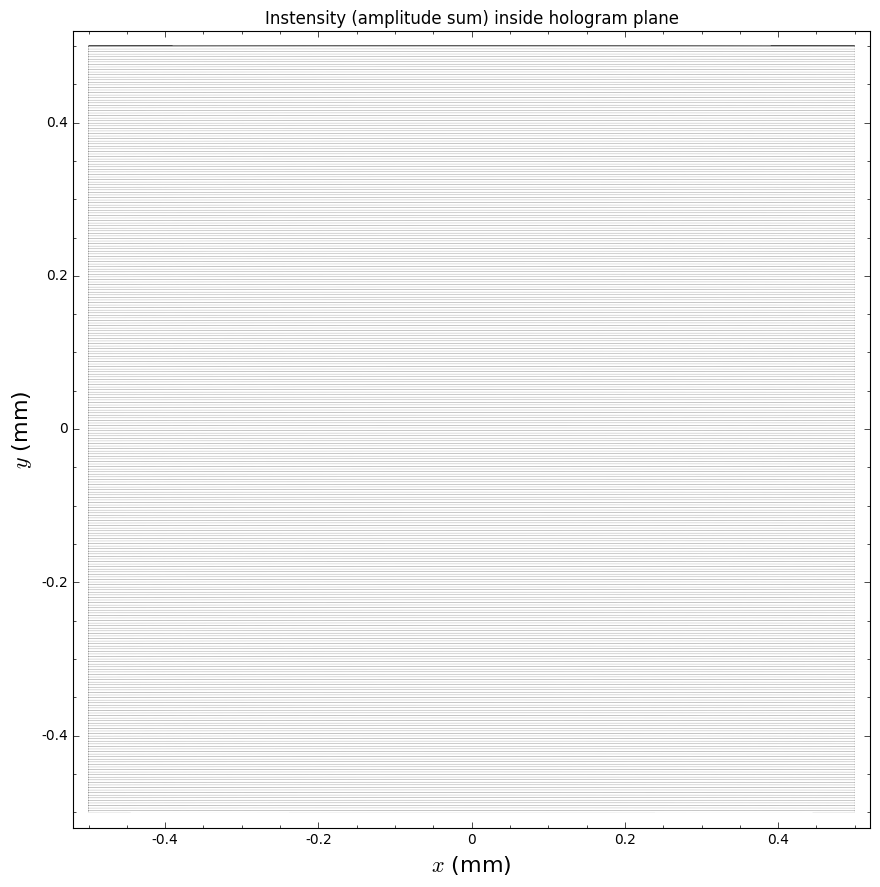

In [39]:
g=contour_plot(U5(x,y), (x,-0.5,0.5), (y,-0.5,0.5),plot_points=2000,figsize=[9,9],cmap='gray')
g.show(title="Instensity (amplitude sum) inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

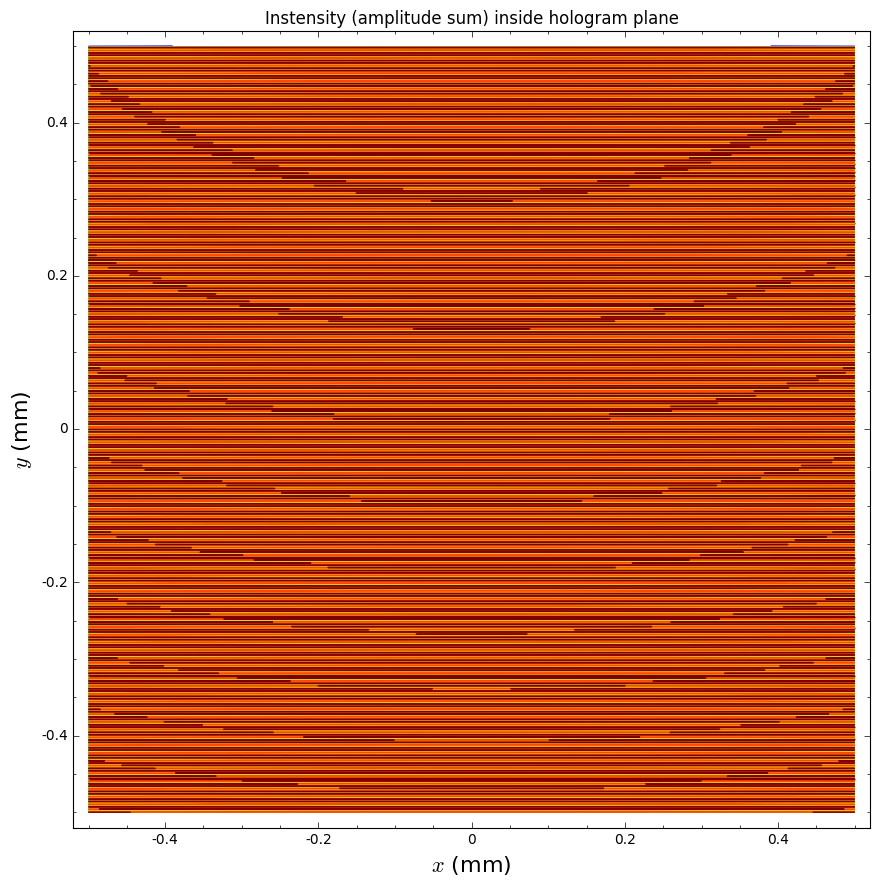

In [29]:
g=contour_plot(U5(x,y), (x,-.5,0.5), (y,-.5,0.5),plot_points=1000,figsize=[9,9],cmap='jet')
g.show(title="Instensity (amplitude sum) inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

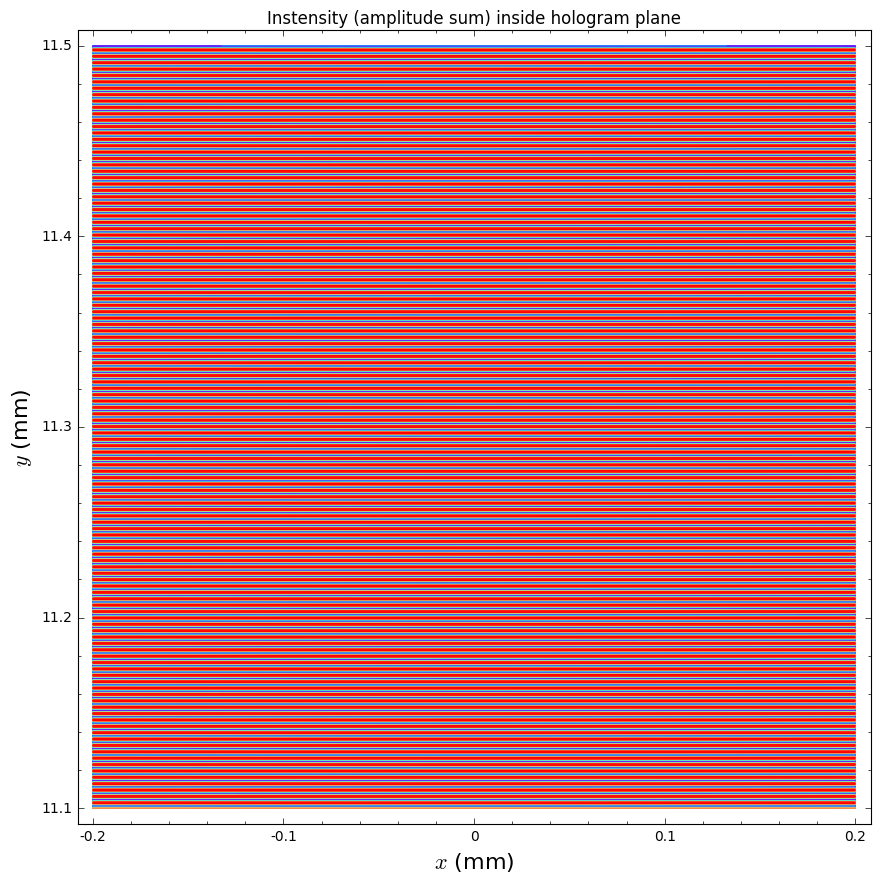

In [40]:
g=contour_plot(U5(x,y), (x,-0.20,0.2), (y,-0.2-dy,0.2-dy),plot_points=2000,figsize=[9,9],cmap='rainbow')
g.show(title="Instensity (amplitude sum) inside hologram plane",axes_labels=('$x$ (mm)','$y$ (mm)'))

In [41]:
U6(y)=U5(0,y)

In [50]:
p=plot(U6(y),-0.05,0.05)

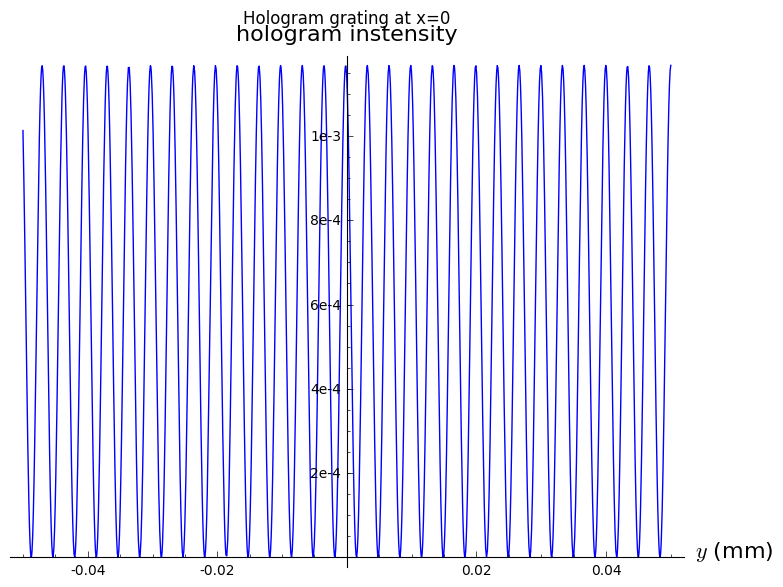

In [51]:
p.show(title="Hologram grating at x=0",axes_labels=('$y$ (mm)','hologram instensity'))

In [44]:
p=plot(U6(y),-1.05,-0.95)

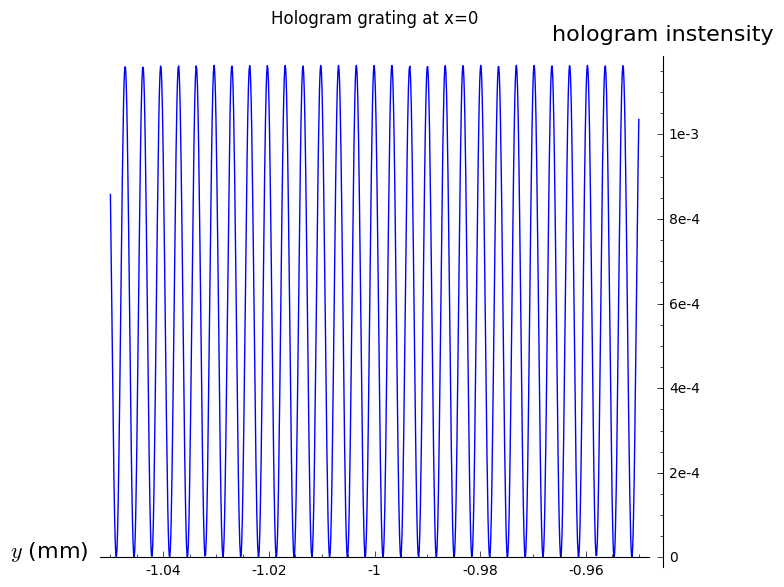

In [45]:
p.show(title="Hologram grating at x=0",axes_labels=('$y$ (mm)','hologram instensity'))

In [54]:
p=plot(U6(y),-0.5,.5)

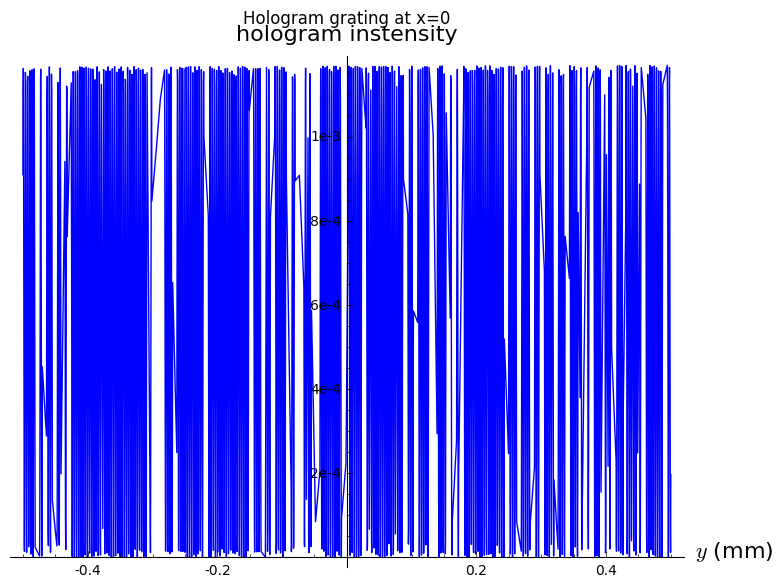

In [55]:
p.show(title="Hologram grating at x=0",axes_labels=('$y$ (mm)','hologram instensity'))